# [画像の代表的な色を抽出する](https://artteknika.hatenablog.com/entry/2019/09/17/151412)

In [ ]:
%%bash

#rm -f *.jpg
curl --output flower.jpg https://www.pakutaso.com/shared/img/thumb/KAZ7842_DSCF3133.jpg
curl --output cat.jpg https://www.pakutaso.com/shared/img/thumb/nuko-8.jpg
curl --output sky.jpg https://www.pakutaso.com/shared/img/thumb/kazuhiro17810000.jpg
curl --output buildings.jpg https://www.pakutaso.com/shared/img/thumb/rtethjdyrsetgshf.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1943k  100 1943k    0     0  1290k      0  0:00:01  0:00:01 --:--:-- 1292k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2049k  100 2049k    0     0  1693k      0  0:00:01  0:00:01 --:--:-- 1693k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.9M  100 11.9M    0     0  7215k      0  0:00:01  0:00:01 --:--:-- 7211k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7056k  100 7056k    0     0  4572k      0  0:00:01  0:00:01 --:--:-- 4570k


In [ ]:
import numpy as np
import PIL.ImageDraw

def color_mean(source_file, dest_file):
    #source_file = 'XXX.jpg'
    #source_file = src
    source = PIL.Image.open(source_file)

    small_img = source.resize((100, 100))  # 時間短縮のために解像度を落とす
    color_arr = np.array(small_img)
    w_size, h_size, n_color = color_arr.shape
    color_arr = color_arr.reshape(w_size * h_size, n_color)

    color_mean = np.mean(color_arr, axis=0)
    color_mean = color_mean.astype(int)
    color_mean = tuple(color_mean)

    im = PIL.Image.new('RGB', (100, 100), color_mean)
    #im.save('YYY.png')
    im.save(dest_file)

In [ ]:
from IPython.display import Image,display_jpeg,display_png

In [ ]:
color_mean("flower.jpg", "flower.png")
color_mean("cat.jpg", "cat.png")
color_mean("sky.jpg", "sky.png")
color_mean("buildings.jpg", "buildings.png")

In [ ]:
#display_jpeg(Image('flower.jpg'))

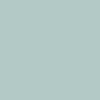

In [ ]:
display_png(Image('flower.png'))

In [ ]:
#display_jpeg(Image('cat.jpg'))

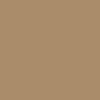

In [ ]:
display_png(Image('cat.png'))

In [ ]:
#display_jpeg(Image('sky.jpg'))

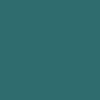

In [ ]:
display_png(Image('sky.png'))

In [ ]:
#display_jpeg(Image('buildings.jpg'))

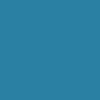

In [ ]:
display_png(Image('buildings.png'))

In [ ]:
import numpy as np
import PIL.ImageDraw
import scipy.stats

def color_mode(source_file, dest_file):
    #source_file = 'XXX.jpg'
    source = PIL.Image.open(source_file)

    small_img = source.resize((100, 100))
    color_arr = np.array(small_img)
    w_size, h_size, n_color = color_arr.shape
    color_arr = color_arr.reshape(w_size * h_size, n_color)
    color_code = ['{:02x}{:02x}{:02x}'.format(*elem) for elem in color_arr]
    mode, _ = scipy.stats.mode(color_code)
    r = int(mode[0][0:2], 16)
    g = int(mode[0][2:4], 16)
    b = int(mode[0][4:6], 16)
    color_mode = (r, g, b)

    im = PIL.Image.new('RGB', (100, 100), color_mode)
    #im.save('YYY.png')
    im.save(dest_file)

In [ ]:
color_mode("flower.jpg", "flower.png")
color_mode("cat.jpg", "cat.png")
color_mode("sky.jpg", "sky.png")
color_mode("buildings.jpg", "buildings.png")

In [ ]:
#display_jpeg(Image('flower.jpg'))

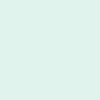

In [ ]:
display_png(Image('flower.png'))

In [ ]:
#display_jpeg(Image('cat.jpg'))

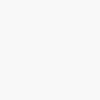

In [ ]:
display_png(Image('cat.png'))

In [ ]:
#display_jpeg(Image('sky.jpg'))

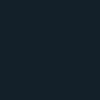

In [ ]:
display_png(Image('sky.png'))

In [ ]:
#display_jpeg(Image('buildings.jpg'))

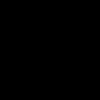

In [ ]:
display_png(Image('buildings.png'))

In [ ]:
import numpy as np
import PIL.ImageDraw

def color_median(source_file, dest_file):
    #source_file = 'XXX.jpg'
    source = PIL.Image.open(source_file)

    small_img = source.resize((100, 100))
    color_arr = np.array(small_img)
    w_size, h_size, n_color = color_arr.shape
    color_arr = color_arr.reshape(w_size * h_size, n_color)
    r = [elem[0] for elem in color_arr]
    g = [elem[1] for elem in color_arr]
    b = [elem[2] for elem in color_arr]
    color_median = (int(np.median(r)), int(np.median(g)), int(np.median(b)))

    im = PIL.Image.new('RGB', (100, 100), color_median)
    #im.save('YYY.png')
    im.save(dest_file)


In [ ]:
color_median("flower.jpg", "flower.png")
color_median("cat.jpg", "cat.png")
color_median("sky.jpg", "sky.png")
color_median("buildings.jpg", "buildings.png")

In [ ]:
#display_jpeg(Image('flower.jpg'))

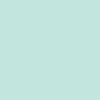

In [ ]:
display_png(Image('flower.png'))

In [ ]:
#display_jpeg(Image('cat.jpg'))

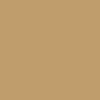

In [ ]:
display_png(Image('cat.png'))

In [ ]:
#display_jpeg(Image('sky.jpg'))

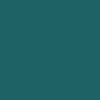

In [ ]:
display_png(Image('sky.png'))

In [ ]:
#display_jpeg(Image('buildings.jpg'))

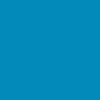

In [ ]:
display_png(Image('buildings.png'))

In [ ]:
import numpy as np
import PIL.ImageDraw
import scipy.cluster

N_CLUSTER = 3

def kmeans_process(img, n_cluster):
    sm_img = img.resize((100, 100))
    color_arr = np.array(sm_img)
    w_size, h_size, n_color = color_arr.shape
    color_arr = color_arr.reshape(w_size * h_size, n_color)
    color_arr = color_arr.astype(np.float)

    codebook, distortion = scipy.cluster.vq.kmeans(color_arr, n_cluster)  # クラスタ中心
    code, _ = scipy.cluster.vq.vq(color_arr, codebook)  # 各データがどのクラスタに属しているか

    n_data = []  # 各クラスタのデータ数
    for n in range(n_cluster):
        n_data.append(len([x for x in code if x == n]))

    desc_order = np.argsort(n_data)[::-1]  # データ数が多い順に「第○クラスタ、第○クラスタ、、、、」

    return ['#{:02x}{:02x}{:02x}'.format(*(codebook[elem].astype(int))) for elem in desc_order]

def color_cluster(source_file, dest_file):
    #source_file = 'XXX.jpg'
    source = PIL.Image.open(source_file)
    colors = kmeans_process(source, N_CLUSTER)

    im_size = 100
    im = PIL.Image.new('RGB', (im_size, im_size), (255, 255, 255, 255))
    draw = PIL.ImageDraw.Draw(im)
    single_width = im_size / N_CLUSTER

    for i, color in enumerate(colors):
        # 色を描画
        p1 = (single_width * i, 0)
        p2 = (single_width * (i + 1), im_size)
        pos = [p1, p2]
        draw.rectangle(pos, fill=color)

    #im.save('YYY.png')
    im.save(dest_file)


In [ ]:
color_cluster("flower.jpg", "flower.png")
color_cluster("cat.jpg", "cat.png")
color_cluster("sky.jpg", "sky.png")
color_cluster("buildings.jpg", "buildings.png")

In [ ]:
#display_jpeg(Image('flower.jpg'))

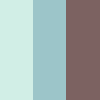

In [ ]:
display_png(Image('flower.png'))

In [ ]:
#display_jpeg(Image('cat.jpg'))

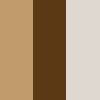

In [ ]:
display_png(Image('cat.png'))

In [ ]:
#display_jpeg(Image('sky.jpg'))

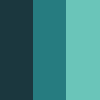

In [ ]:
display_png(Image('sky.png'))

In [ ]:
#display_jpeg(Image('buildings.jpg'))

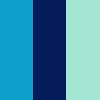

In [ ]:
display_png(Image('buildings.png'))